# Video Sampling Example

This notebook demonstrates how to use the sampling functions to generate videos from text prompts.

In [1]:
import sys
from sample import sample_videos, sample_single_video, prompts
from release_server import load_merge_config, load_all

sageattention package is not installed
flash attn 2 available True
flash attn 3 available False
sage attn available False
SAGEATTN_AVAILABLE: False
DO_COMPILE False


In [2]:
import torch
import gc
config = load_merge_config("/workspace/release-sf/configs/self_forcing_server_14b.yaml")
models = load_all(config)
print("✅ Models loaded and ready to use!")
gc.collect()
torch.cuda.empty_cache()


2025-10-09 22:36:30.284 - INFO - Starting model loading...
2025-10-09 22:36:30.285 - DEBUG - Using checkpoint: checkpoints/14b_200.safetensors
Loading text encoder:   0%|          | 0/4 [00:00<?, ?it/s]2025-10-09 22:36:44.733 - DEBUG - Text encoder import took: 14.44s
2025-10-09 22:36:46.488 - DEBUG - Text encoder load completed in: 1.76s, total: 16.20s
2025-10-09 22:36:46.489 - DEBUG - Loading text encoder took: 16.20s
Loading transformer:  25%|██▌       | 1/4 [00:16<00:48, 16.20s/it] 2025-10-09 22:36:46.490 - DEBUG - Transformer import took: 0.00s
2025-10-09 22:37:51.393 - DEBUG - Loading transformer state dict from checkpoints/14b_200.safetensors


Loading WAN model, with name Wan2.1-T2V-14B


2025-10-09 22:39:09.048 - DEBUG - Transformer load completed in: 142.56s, total: 142.56s
2025-10-09 22:39:09.052 - DEBUG - Loading transformer took: 142.56s
Loading VAE:  50%|█████     | 2/4 [02:38<03:01, 90.53s/it]        2025-10-09 22:39:09.053 - DEBUG - Using demo_utils.vae_block3.VAEEncoderWrapper
2025-10-09 22:39:09.053 - DEBUG - Using demo_utils.vae_block3.VAEDecoderWrapper
2025-10-09 22:39:09.084 - INFO - loading Wan-2.1/Wan2.1-T2V-1.3B/Wan2.1_VAE.pth
2025-10-09 22:39:10.939 - DEBUG - VAE load completed in: 1.89s
2025-10-09 22:39:10.957 - DEBUG - Loading VAE took: 1.90s
Initializing pipeline:  75%|███████▌  | 3/4 [02:40<00:50, 50.06s/it]2025-10-09 22:39:11.015 - DEBUG - Pipeline import took: 0.06s
2025-10-09 22:39:11.016 - DEBUG - Pipeline initialization completed in: 0.06s
2025-10-09 22:39:11.016 - DEBUG - Initializing pipeline took: 0.06s
Initializing pipeline: 100%|██████████| 4/4 [02:40<00:00, 40.18s/it]
2025-10-09 22:39:11.017 - INFO - All models loaded successfully in 160.

Incompatible _IncompatibleKeys(missing_keys=['mean', 'std'], unexpected_keys=[]) while loading vae decoder
KV inference with 3 frames per block
✅ Models loaded and ready to use!


2025-10-09 22:39:11.592 - DEBUG - matplotlib data path: /workspace/release-sf/.venv/lib/python3.11/site-packages/matplotlib/mpl-data
2025-10-09 22:39:11.610 - DEBUG - CONFIGDIR=/root/.config/matplotlib
2025-10-09 22:39:11.971 - DEBUG - interactive is False
2025-10-09 22:39:11.972 - DEBUG - platform is linux
2025-10-09 22:39:12.104 - DEBUG - CACHEDIR=/workspace/.cache/matplotlib
2025-10-09 22:39:12.109 - DEBUG - Using fontManager instance from /workspace/.cache/matplotlib/fontlist-v390.json
2025-10-09 22:39:12.771 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2025-10-09 22:39:12.774 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2025-10-09 22:39:12.778 - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2025-10-09 22:39:12.779 - DEBUG - findfont: score(FontEntry(fname='/workspace/release-sf/.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/De

tensor([23.5064, 15.7791,  7.9444,  0.0000], device='cuda:0')


NotImplementedError: Input Error: Only 3D, 4D and 5D input Tensors supported (got 1D) for the modes: nearest | linear | bilinear | bicubic | trilinear | area | nearest-exact (got nearest)

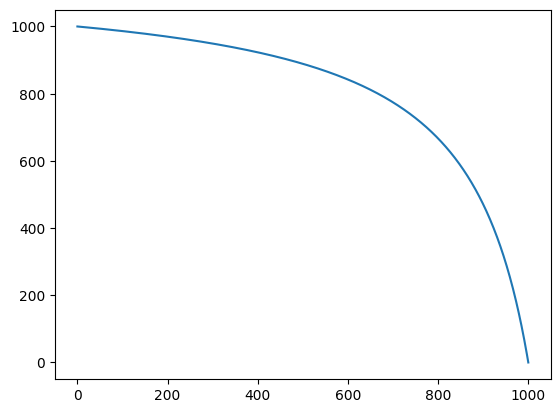

In [ ]:
# from release_server import get_denoising_schedule
# from pprint import pprint


# st = models.pipeline.scheduler.timesteps
# zero_padded_timesteps = torch.cat((st.cpu(), torch.tensor([0], dtype=torch.float32))).to(torch.cuda.current_device())
# # pprint(zero_padded_timesteps.tolist())
# t = get_denoising_schedule(zero_padded_timesteps, 1, steps=5)
# import matplotlib.pyplot as plt
# print(zero_padded_timesteps[-4:])
# plt.plot(zero_padded_timesteps.tolist())
# # print(type(t))
# t = torch.nn.functional.interpolate(t, size=len(zero_padded_timesteps)).squeeze(0)
# print(t.shape)
# plt.plot(t.tolist())
# plt.show()


In [4]:

test_prompts = [
    "A sorcerer stands with one hand outstretched, holding a roiling flame that coils and twists restlessly around his palm and fingers, sparks shooting off in unpredictable arcs. The fire spirals and lashes outward, wrapping around his arm like a living serpent before snapping back toward his hand in a continuous, fluid motion. His cloak ripples in the heat’s updraft as the flame flares and contracts, creating bursts of glowing embers that rise and scatter through the air",
    "Adrenaline-pumped, wide-eyed ginger kitten in vintage aviator goggles blasts down a narrow cobblestone street on a bright-yellow mini-bicycle. Camera whip-pans in from behind, then snap-zooms past the spinning front wheel into an ultra-close-up of the cat’s determined face, fur rippling in the wind. Hard sunlight streaks across the scene, creating dynamic highlights and streaking motion-blur on the spokes.",
    "A stylish woman walks down a Tokyo street filled with warm glowing neon and animated city signage. She wears a black leather jacket, a long red dress, and black boots, and carries a black purse. She wears sunglasses and red lipstick. She walks confidently and casually. The street is damp and reflective, creating a mirror effect of the colorful lights. Many pedestrians walk about.",
    "A lone samurai in traditional armor practices kata in a quiet field at dawn, his silhouette framed against a misty horizon. Each sword strike is fluid yet forceful, the blade flashing as it slices through the air with precise arcs and sudden bursts of speed. His feet shift with practiced agility, sending up small sprays of dirt as he pivots, steps, and lunges in a continuous flow of disciplined motion. The static camera holds the scene firmly in place, emphasizing the intensity and grace of his movements against the stillness of the landscape.",
    "Tracking shot, cinematic style, of a surreal alien bird with iridescent feathers and bio-luminescent wings, gracefully flying through a dense alien forest — the camera follows the bird in one continuous dynamic shot, weaving through twisted glowing trees, over bioluminescent mushrooms, and past floating pollen-like orbs. The bird performs elegant aerial maneuvers — barrel rolls, sharp turns, dives — as it dodges branches and interacts with the strange atmosphere. The forest pulses with ambient light and motion-reactive flora.",
    "A single crystalline drop of water hovers in midair against a soft gradient background, shimmering with refracted light. The drop quivers, rippling with internal motion, before stretching outward as if blooming from within. Its surface tension warps into delicate translucent petals that unfurl in one continuous motion. The petals radiate with glistening reflections, the drop gracefully becoming a luminous flower suspended in space.",
    "Two scarred alley cats, one orange tabby with torn ears and one lean gray bruiser, stand upright in a flickering streetlight. They lash out with vicious swipes, their miniature boxing gloves cracked and worn, landing heavy blows that make fur and sweat fly. The gray cat snarls as it takes a hook to the jaw, stumbling back before lunging forward with a brutal counter. The sound of claws scraping the pavement mixes with the thud of their punches, the fight relentless and raw.",
    "She returns in a radiant gown made entirely of flowing gold silk, draped in voluminous layers that trail behind her in shimmering waves. The fabric ripples dramatically with each step, catching and scattering light across the runway. The dress moves like liquid metal, transforming her walk into a continuous display of luxury and opulence, radically different from her previous sculptural look.",
    "Under glowing neon lights in a surreal diner, a polar bear sits awkwardly in a red leather booth, gripping a massive BLT with mayonnaise dripping from its paws. It devours the sandwich with primal hunger, grease smearing across its white fur as the jukebox hums in the background. Fries scatter across the floor as the bear’s huge body shifts against the tiny furniture, the booth creaking under its weight. The continuous shot blends humor, absurdity, and menace in equal measure.",
    "Inside a steaming porcelain coffee cup, two tiny wooden galleons clash on dark, swirling waves of coffee. Cannons fire with sharp flashes, sending miniature plumes of smoke curling into the air, while splinters of wood spray from direct hits. The surface of the coffee sloshes violently with every broadside, waves lapping against the cup’s rim. Steam drifts upward, blending with the smoke, as the ships circle each other in a chaotic, continuous duel.",
    "In a brightly lit gymnasium, a young gymnast in a red leotard swings powerfully on the uneven bar, launching into a perfect backflip. Her body tucks tightly mid-air, spinning in one continuous motion before her hands snap back onto the bar with precision. Chalk dust bursts into the air with the impact, drifting like smoke around her. The crowd gasps faintly in the background, the scene locked in graceful, dynamic motion.",
    "Under the glare of bright stadium lights, the golden retriever launches high off the springboard, twisting into a daring double flip. Its ears flap wildly mid-air, and the shimmering pool reflects its spinning form. The audience erupts in cheers as the dog’s paws extend gracefully in the final moment before the dive. A splash explodes upward as it enters the water, sending ripples across the Olympic rings painted on the pool floor.", 
]

In [ ]:
import sample
from sample import GenerateParams
params = GenerateParams(
    prompt="",
    width=832,
    height=480,
    num_blocks=8,
    seed=1234,
    kv_cache_num_frames=3,
    thresh_kv_scale = 1.,
    do_kv_recomp=True,
    num_denoising_steps=4,
)
prompts = [
    "A lone samurai in traditional armor practices kata in a quiet field at dawn, his silhouette framed against a misty horizon. Each sword strike is fluid yet forceful, the blade flashing as it slices through the air with precise arcs and sudden bursts of speed. His feet shift with practiced agility, sending up small sprays of dirt as he pivots, steps, and lunges in a continuous flow of disciplined motion. The static camera holds the scene firmly in place, emphasizing the intensity and grace of his movements against the stillness of the landscape.",
]
results = sample.sample_videos(
    prompts_list=test_prompts,
    models=models,  # Reuse loaded models
    params=params,
    output_dir="current_release_4step",
    save_videos=True,
    fps=16
)

Sampling videos:   0%|          | 0/12 [00:00<?, ?it/s]


📝 Prompt 1/12: A sorcerer stands with one hand outstretched, holding a roiling flame that coils and twists restlessly around his palm and fingers, sparks shooting off in unpredictable arcs. The fire spirals and lashes outward, wrapping around his arm like a living serpent before snapping back toward his hand in a continuous, fluid motion. His cloak ripples in the heat’s updraft as the flame flares and contracts, creating bursts of glowing embers that rise and scatter through the air
Zero reinitialization of kv cache
Zero reinitialization of crossattn cache
🎬 Generating 8 blocks...
Zero reinitialization of kv cache


## Video to Video

In [ ]:

params = GenerateParams(
    prompt="",
    width=832,
    height=480,
    num_blocks=9,
    seed=1234,
    kv_cache_num_frames=3,
    thresh_kv_scale = 1.,
    do_kv_recomp=True,
    num_denoising_steps=8,

    input_vid = "......" # ADD this
)
prompts = [
    "A massive wooden ship sails through a dark, stormy sea, its masts swaying violently as enormous waves crash against the hull. The ocean roars with relentless power, sending bursts of white spray over the deck as the crew struggles to keep control. Rain pours down in thick sheets, blurring the horizon into a gray haze. The camera moves with the ship’s motion, capturing the rhythm of the storm and the sheer force of the sea.",
]
results = sample.sample_videos(
    prompts_list=[p],
    models=models,  # Reuse loaded models
    params=params,
    output_dir="out_release",
    save_videos=True,
    fps=16
)